# cost function

For every community, the cost function is defined as $weight \times distance^2$. Namely, the cost function is $w ((x - x_0)^2 + (y - y_0)^2)$. w is described as the max infected number divided by the time of the infection climax. 

In [19]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import cv2 as cv
import time



## Functions

In [3]:
def singleCostFunc(x_old: float, y_old: float) -> np.ndarray:
    '''
        x and y are the position of one single clinic in the coordinate, 
        The return value stores the coefficients of [x^2, x, y^2, y, 1]
    '''
    return np.array([1, -2 * x_old, 1, -2 * y_old, x_old ** 2 + y_old ** 2])

def costFunc(w_list: list, x_list: list, y_list: list):
    '''
        w_list stores the list of weight, 
        x_list stores the list of the x-axis, 
        y_list stores the list of the y-axis, 
        cost_func_coeff is the total sum of coefficients
    '''
    try:
        cost_func_coeff = np.zeros((1, 5)) # 5 means the numbers of coefficients
        # optimization
        for i in range(len(w_list)): 
            cost_func_coeff += w_list[i] * singleCostFunc(x_list[i], y_list[i]) # Addition between numpy arrays
            #print(cost_func_coeff)
        return cost_func_coeff
    except Exception as e:
        print('Sum of w_list: {}'.format(np.sum(np.array(w_list))))
        print('ERROR in cost_func: w_list = {}, x_list = {}, y_list = {}'.format(len(w_list), len(x_list), len(y_list)))
        print(e)

# Compute the partial differential in the form of [x^2, x, y^2, y, 1]
def partialDiff(coefficient_list, variable):
    second_x, first_x, second_y, first_y, constant = coefficient_list
    if variable == "x":
        diff_coefficient_list = [0, second_x*2, 0, 0, first_x]
    else:
        diff_coefficient_list = [0, 0, 0, second_y*2, first_y]
    return diff_coefficient_list

# plug in the value of x and y into the coefficient list
def plugXY (coefficient_list, x, y):
    second_x, first_x, second_y, first_y, constant = coefficient_list
    value = second_x * x * x + first_x * x + second_y * y * y + first_y * y + constant
    return value

# use gradient descent method to optimize x and y
def optimzeXY (x_list, y_list, w_list, x0, y0, learning_rate, times):
    x = x0
    y = y0
    cost_list = []
    for i in range (times):
        
        all_cost = costFunc(x_list, y_list, w_list).tolist()[0]
        #print(all_cost.tolist()[0])
        #print(type(all_cost))
        all_cost_x_efficient = partialDiff(all_cost, "x")
        all_cost_x_value = plugXY (all_cost_x_efficient, x, y)
        all_cost_y__efficient = partialDiff(all_cost, "y")
        all_cost_y_value = plugXY (all_cost_y__efficient, x, y)

        x = x - learning_rate * all_cost_x_value
        y = y - learning_rate * all_cost_y_value

        print(x,y)
        print("cost: ", plugXY(all_cost, x, y))
        cost_list.append(plugXY(all_cost, x, y))
        print("")
    
    return (x, y, cost_list)

## Method1: Gradient Descent

0.4999592766427639 0.5007631643284979
cost:  1.9798526068133668

0.49991863948522336 0.5015247132564681
cost:  1.9740426808209168

0.49987808834491826 0.5022846502032514
cost:  1.968257324699211

0.49983762303977475 0.5030429785809507
cost:  1.962496434543569

0.49979724338810433 0.5037997017944466
cost:  1.9567599068887063

0.49975694920860314 0.5045548232414123
cost:  1.9510476387068891

0.499716740320351 0.5053083463123295
cost:  1.9453595274060902

0.4996766165428108 0.5060602743905027
cost:  1.939695470828127

0.4996365776958275 0.5068106108520753
cost:  1.9340553672468488

0.4995966235996273 0.5075593590660443
cost:  1.9284391153662934

0.4995567540748172 0.5083065223942754
cost:  1.92284661431888

0.4995169689423837 0.5090521041915183
cost:  1.9172777636635807

0.49947726802369224 0.5097961078054215
cost:  1.9117324633841388

0.4994376511404865 0.5105385365765477
cost:  1.9062106138872537

0.4993981181148873 0.5112793938383883
cost:  1.900712116000804

0.4993586687693922 0.51201

<AxesSubplot: >

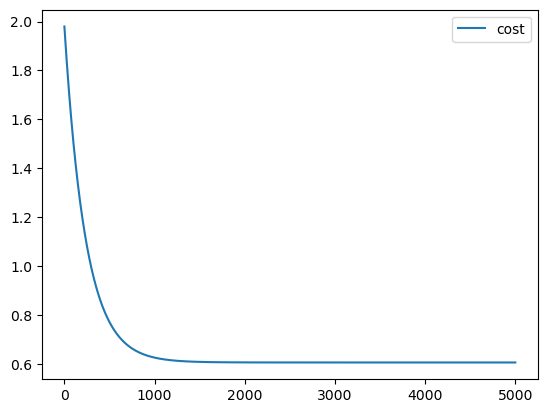

In [18]:
data_df = pd.read_excel("community.xlsx")
max_x = 1765
max_y = 1246
x_list = (data_df["x"]/max_x).tolist()
y_list = (data_df["y"]/max_y).tolist()
w_list = data_df["w"].tolist()

x,y,cost_list = optimzeXY (x_list, y_list, w_list, 0.5, 0.5, 0.0001, 5000)

print("the optimal point is: (",str(x),",",str(y),")")
print("the optimal point is: (",str(x*max_x),",",str(y*max_y),")")
cost_df = pd.DataFrame()
cost_df["cost"] = cost_list
cost_df.plot()

In [19]:
data_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,社区名称,地址,常住人口,发热诊室,x,y,标记名称,w
0,0,0,0,金山街道金洲社区,福州市仓山区金环路5号,8500.0,金洲社区卫生服务站,1154,283,福建省福州市仓山区金环路5号,0.628755
1,1,1,1,金山街道幸福社区,仓山区浦上大道418号泰禾红峪A14号楼一层,7850.0,丽景社区卫生服务站,801,945,福建省福州市仓山区葛屿路,1.000000
2,2,2,2,金山街道六江道社区,福州市仓山区金桔路826号68栋旁,6900.0,中天社区卫生服务站,432,980,福建省福州市仓山区金桔路,0.795867
3,3,3,3,金山街道金环社区,福州市仓山区金山街道金榕南路10号榕城广场8号楼一层,10832.0,金洲社区卫生服务站,1303,256,福建省福州市仓山区友兰路,0.628755
4,4,4,4,金山街道鑫龙社区,福州市仓山区石边支路1号,9000.0,丽景社区卫生服务站,704,479,福建省少年儿童图书馆金山街道鑫龙社区分馆,1.000000


## Method2: Heat map

<AxesSubplot: >

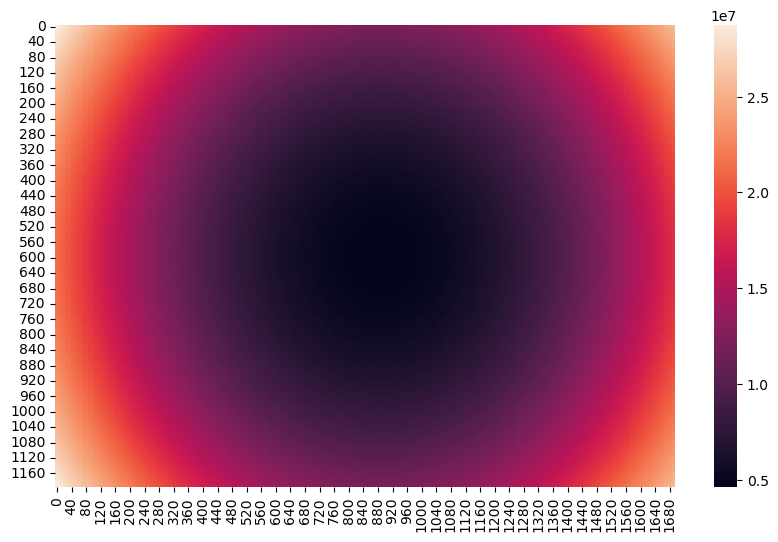

In [39]:
data_df = pd.read_excel("community.xlsx")
communities_x_list = (data_df["x"]).tolist()
communities_y_list = (data_df["y"]).tolist()
communities_w_list = data_df["w"].tolist()

communities_w_list = np.ones(21).tolist()
data_df.head()

interval = 10
x_coordinate_list_str = [str(i) for i in range (0,1700,interval)]
y_coordinate_list_str = [str(i) for i in range (0,1200,interval)]
x_coordinate_list = [i for i in range (0,1700,interval)]
y_coordinate_list = [i for i in range (0,1200,interval)]

heatmap_array = np.zeros((len(y_coordinate_list),len(x_coordinate_list)))
one_cost_coefficient = costFunc(communities_w_list, communities_x_list, communities_y_list).tolist()[0]

for i in range(0,len(x_coordinate_list)): 
    for j in range(0,len(y_coordinate_list)):
        x = x_coordinate_list[i]
        y = y_coordinate_list[j]
        one_cost_value = plugXY (one_cost_coefficient, x, y)
        heatmap_array[j,i] = one_cost_value
        
x_tick_list = [str(i) for i in range (0,1700,interval)]
y_tick_list = [str(i) for i in range (0,1200,interval)]

data_tick_dic = {}

for i in range(len(x_tick_list)):
    data_tick_dic[x_tick_list[i]] = heatmap_array[:,i]

pd_data=pd.DataFrame(data_tick_dic,index=y_tick_list,columns=x_tick_list)

plt.figure(figsize=(10, 6))
sns.heatmap(pd_data, square=False)

In [40]:
#np.min(heatmap_array) 4082738
loc = np.where(heatmap_array == np.min(heatmap_array))
point = (loc[1][0]*interval, loc[0][0]*interval)
text_point = (loc[1][0]*interval + 20, loc[0][0]*interval)
print("the best location for fifth clinic is: ", str(point))

map = cv.imread("map0.jpg") #maps_generated
cv.circle(map, point, 16, (0, 0, 255), thickness = -1)
cv.putText(map, str(point), text_point, cv.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
current_time = time.strftime('%Y-%m-%d_%H-%M-%S', time.localtime())
save_path = 'maps_generated/' + current_time + '.png'
if (cv.imwrite(save_path, map, [cv.IMWRITE_PNG_COMPRESSION, 0])):
    cv.imwrite(save_path, map, [cv.IMWRITE_PNG_COMPRESSION, 0])
    print("saved sucessfully in ", save_path)



the best location for fifth clinic is:  (890, 600)
saved sucessfully in  maps_generated/2023-01-08_15-09-48.png
